# **Linear Regression with Multiple Variable**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving insurance.xlsx to insurance.xlsx


In [4]:
df=pd.read_excel('insurance.xlsx')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [9]:
df.shape

(1338, 7)

# One Hot Encoding

In [12]:
df=pd.get_dummies(df,drop_first='True')#one hot encoding short

In [13]:
df = df.astype(int)#on int
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [14]:
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.169656,1.094918,13269.928999,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.119875,1.205493,12110.012755,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.000000,0.000000,1121.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.000000,0.000000,4740.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.000000,1.000000,9381.500000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.000000,2.000000,16639.250000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.000000,5.000000,63770.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.describe().T  #row as column,column as row

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0,27.0,39.0,51.00,64.0
bmi,1338.0,30.169656,6.119875,15.0,26.0,30.0,34.00,53.0
children,1338.0,1.094918,1.205493,0.0,0.0,1.0,2.00,5.0
charges,1338.0,13269.928999,12110.012755,1121.0,4740.0,9381.5,16639.25,63770.0
sex_male,1338.0,0.505232,0.500160,0.0,0.0,1.0,1.00,1.0
smoker_yes,1338.0,0.204783,0.403694,0.0,0.0,0.0,0.00,1.0
region_northwest,1338.0,0.242900,0.428995,0.0,0.0,0.0,0.00,1.0
region_southeast,1338.0,0.272048,0.445181,0.0,0.0,0.0,1.00,1.0
region_southwest,1338.0,0.242900,0.428995,0.0,0.0,0.0,0.00,1.0


# Data Visualization

<Figure size 800x800 with 0 Axes>

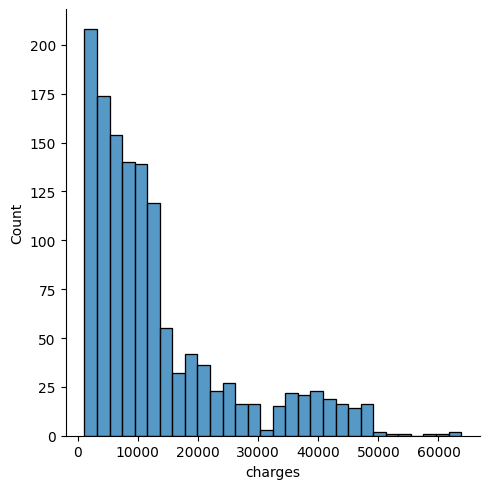

In [17]:
plt.figure(figsize=(8,8))
sns.displot(df['charges'])

<Axes: >

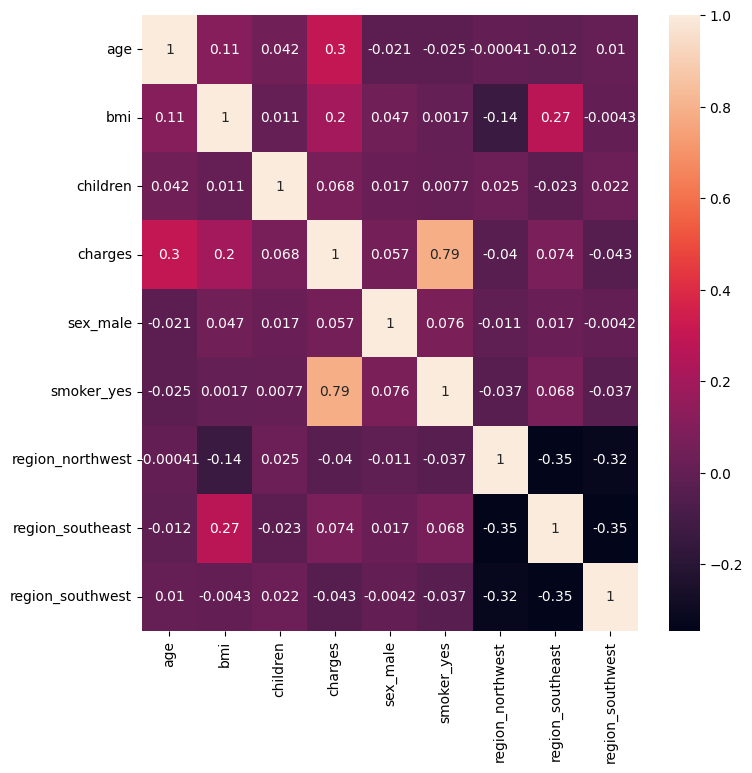

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

# TrainTest split

In [20]:
x=df.drop('charges',axis=1)
y=df['charges']

In [21]:
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0


In [22]:
y.head()

,charges
0,16884
1,1725
2,4449
3,21984
4,3866


In [23]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test =tts(x,y,test_size=0.3,random_state= 55)

In [24]:
x_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
91,53,24,1,0,0,1,0,0
474,54,25,3,1,1,0,0,1
888,22,39,0,1,0,0,0,1
571,18,37,1,0,0,0,1,0
192,25,25,0,1,0,0,1,0


In [26]:
y_train.head()

,charges
91,10942
474,25382
888,1682
571,2219
192,2137


# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg=LinearRegression()

In [29]:
reg.fit(x_train,y_train)

LinearRegression()

In [31]:
pred=reg.predict(x_test)
pred

array([ 7226.20247004, 10741.53910475,  -477.39181588, 28296.51565619,
       12646.68088604, 28601.03181712, 36902.89900131,  3838.4094543 ,
       34199.96443577,  3979.307616  ,  7389.08650908, 11398.01193539,
        5125.4959975 ,  4557.6683219 ,  9162.9988464 , 10669.6821311 ,
       39121.96987424,  6934.14142382,  9480.42994797, 34059.57240146,
       10020.1177995 , 28225.16108668, 15089.42712628, 10299.48673272,
        2587.81924086, 11054.32027465, 15805.80250102, 10165.80595218,
       10021.9064657 ,  2166.27296208, 30461.65395976, 12270.7879282 ,
       32614.06129469, 26700.85147903,  9248.02826739,  5872.06453045,
        6171.73895669,  5221.3184961 ,  7156.50793404, 29175.40301752,
        3282.07638232, 11448.22913352,  9313.55640343, 27080.45248928,
       24304.77441012,  5812.82241251,  6731.07707668, 13361.74964791,
       12098.44509408, 16297.87147094, 12609.42664902, 26404.93500225,
       15493.69518749,  6915.68322248, 10920.86776399,  5125.4959975 ,
      

# Creating dataframe

In [32]:
df_pred=pd.DataFrame({'Actual':y_test,'Predicted':pred,'Difference':abs(y_test-pred)})
df_pred

,Actual,Predicted,Difference
1247,6059,7226.202470,1167.202470
1126,10214,10741.539105,527.539105
35,1625,-477.391816,2102.391816
1001,34472,28296.515656,6175.484344
765,11842,12646.680886,804.680886
...,...,...,...
923,4320,8138.176190,3818.176190
406,4185,4249.665060,64.665060
1088,9748,16817.204089,7069.204089
208,13880,13507.557789,372.442211


In [33]:
m=reg.coef_
m

array([  247.08158164,   327.28961875,   480.11454036,  -134.78679319,
       24232.63672614,  -469.32146275,  -645.35199846, -1090.93405006])

In [34]:
#In this case it is best to use label encoding

In [35]:
reg.score(x_test,y_test)

0.7351004705981082

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.7351004705981082

# Apply Label Encoding

In [38]:
df1=pd.read_excel('insurance.xlsx')

In [39]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le=LabelEncoder()

In [42]:
from pandas.core.dtypes.common import is_numeric_dtype

In [43]:
for col in df1.columns:
  if is_numeric_dtype(df1[col]):
    continue
  else :
    df1[col]=le.fit_transform(df1[col])

In [44]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [45]:
x=df1.drop('charges',axis=1)
y=df1['charges']

In [46]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [47]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [48]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest =tts(x,y,test_size=0.3,random_state=55)

In [49]:
xtrain.head()

,age,sex,bmi,children,smoker,region
91,53,0,24.795,1,0,1
474,54,1,25.100,3,1,3
888,22,1,39.500,0,0,3
571,18,0,37.290,1,0,2
192,25,1,25.740,0,0,2


In [50]:
ytrain.head()

,charges
91,10942.13205
474,25382.29700
888,1682.59700
571,2219.44510
192,2137.65360


In [52]:
xtest.head()

,age,sex,bmi,children,smoker,region
1247,33,1,29.400,4,0,3
1126,55,1,29.900,0,0,3
35,19,1,20.425,0,0,1
1001,24,1,32.700,0,1,3
765,57,0,31.825,0,0,1


In [53]:
from sklearn.linear_model import LinearRegression
reg1=LinearRegression()

In [54]:
reg1.fit(xtrain,ytrain)

LinearRegression()

In [55]:
pred1=reg1.predict(xtest)
pred1

array([ 7201.97071366, 10893.43515939,  -449.44589833, 28423.75793679,
       12850.83675089, 28563.41923493, 36844.14939915,  4083.27931287,
       34234.48647848,  4039.59632221,  7409.61667536, 11325.34098837,
        5006.03798423,  4478.28168954,  9095.69266767, 10691.93563301,
       39262.64055658,  6827.50730215,  9283.23593264, 34183.41924906,
       10266.79092738, 28273.58817795, 15115.90220605, 10216.86883894,
        2540.42692963, 10898.58552424, 15868.64140421, 10116.62609391,
       10125.29686698,  2135.95904276, 30402.56760447, 12505.22447721,
       32484.2853433 , 26668.74937698,  9202.44794498,  5719.06219441,
        5934.07651812,  5349.22168744,  7127.24506313, 29309.30633616,
        3319.96220548, 11409.02024282,  9193.03059908, 27196.49019514,
       24266.73683703,  5704.7206379 ,  6806.04924111, 13349.45944985,
       11973.95850909, 16455.26784736, 12402.99009759, 26441.88814541,
       15324.98996018,  7055.64250966, 10818.7503659 ,  5042.6585485 ,
      

In [57]:
m1=reg1.coef_
m1

array([  246.51577027,  -137.4612638 ,   332.91422064,   474.58490262,
       24240.15183788,  -343.02445622])

In [58]:
r2_score(ytest,pred1)

0.7348248910479992

In [59]:
df_pred=pd.DataFrame({'Actual':ytest,'Predicted':pred1,'Difference':abs(ytest-pred1)})
df_pred

,Actual,Predicted,Difference
1247,6059.17300,7201.970714,1142.797714
1126,10214.63600,10893.435159,678.799159
35,1625.43375,-449.445898,2074.879648
1001,34472.84100,28423.757937,6049.083063
765,11842.62375,12850.836751,1008.213001
...,...,...,...
923,4320.41085,8371.840511,4051.429661
406,4185.09790,4089.583440,95.514460
1088,9748.91060,16910.686904,7161.776304
208,13880.94900,13635.559605,245.389395
